# The Cancer Gene Atlas Cancer (TCGA) - Thyroid Carcinoma (THCA)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
pandas 0.22.0
clustergrammer_widget 1.9.0
seaborn 0.8.1
Fri May 11 14:48:22 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Thyroid carcinoma [THCA]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U,1027,THCA,TCGA,E1C8AF06-9EA4-4062-9264-AA916E0025D1,4C,74.0,NaN,414,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BJ-A45H,1028,THCA,TCGA,778A8F53-53F6-4A03-8CE1-B0928539A444,BJ,45.0,NaN,253,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BJ-A0ZA,1029,THCA,TCGA,4c513413-263e-4c7b-b997-7b688c47b698,BJ,67.0,NaN,87,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BJ-A2N7,1030,THCA,TCGA,CBAB7A72-11F7-4DFE-80F8-1B1EF1CF0055,BJ,30.0,NaN,176,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BJ-A291,1031,THCA,TCGA,d4c68c1c-a3f3-4e0c-b555-d457378a1d24,BJ,56.0,NaN,149,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy",Head/Neck/Chest/Abd/Pelvis,"Other, specify",Prior Malignancy,NaN,NaN,NaN


In [16]:
sample_meta.shape

(507, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_THCA_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,bee2f893-ef90-4c62-85d3-af76c0eb7145,006093dc-e57a-44d5-a29e-8c3c430a518d,4f3d2561-fc5d-4fcf-8688-96eade990f83,77c0aab6-7d1c-4114-bd89-91406d647b13,d172685b-145e-40da-9dfc-363023796054,a6037b3f-4f30-47b4-8710-5fcc7b5ea484,d44128e4-0140-412c-873b-38b22f70bbb5,9786d641-4cbc-4eb7-b4c8-1389603c5550,648e6653-d3ea-4b9a-a32c-219e2927af4c,6f46f94c-b6a9-4e87-b453-ce15bb78e093,...,4bdb2622-94cd-4596-aaa2-7c1f305d76dd,f6a74606-725c-4bd5-9bcf-9a6445624c3c,b3ae3342-c2de-44c7-81b7-58b9716957ee,c1e7caf9-2453-4212-98e7-b720dd90f563,c1e2fee3-82cb-4322-8757-2c44ef4c1e7b,93de3bcf-7f77-49e0-9b21-a5a97a60a50e,62f878a1-c8e7-4b4a-bfe1-1f313034f688,7acc7601-7254-4cc0-ac1c-747403c4f625,8f990e5b-216f-4e5b-a210-7a2c93e54e82,0fde7f4e-c6af-4066-b02f-39cf4af01ce6
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,93.671800,7.262130e+01,97.62710,220.41400,124.58600,101.036000,109.313000,90.60550,116.628000,113.619000,...,110.787000,141.09100,61.852900,156.010000,98.16050,109.00100,140.589000,124.71400,99.895800,135.959000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,55.528900,2.960230e+00,8.05870,3.53780,22.53120,9.174070,5.089360,11.91130,1.394310,0.661897,...,36.830300,36.07900,11.805200,58.102700,36.55950,43.64720,68.436100,24.57760,55.538800,46.761600
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,13.606900,4.942760e+00,9.95505,9.98082,5.87510,21.752900,11.723600,9.46611,3.929580,5.588260,...,11.981300,14.96540,11.488800,11.066400,11.51180,17.41120,11.874700,16.17990,13.039700,6.896700
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,33.119600,9.784420e+00,24.81440,17.20990,22.98400,62.708700,31.343300,39.75460,17.719700,12.008400,...,30.483400,56.22200,11.244600,33.055500,25.79760,37.31040,31.781000,31.40510,48.343800,17.923900
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.198436,1.054310e-08,1.80984,0.00000,0.83943,0.805466,0.275327,1.11728,0.024414,0.000000,...,0.584131,1.78328,0.265022,0.902955,0.48345,5.34093,0.167196,1.69394,0.268061,0.569526


In [19]:
matrix.shape

(199169, 572)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,bee2f893-ef90-4c62-85d3-af76c0eb7145,006093dc-e57a-44d5-a29e-8c3c430a518d,4f3d2561-fc5d-4fcf-8688-96eade990f83,77c0aab6-7d1c-4114-bd89-91406d647b13,d172685b-145e-40da-9dfc-363023796054,a6037b3f-4f30-47b4-8710-5fcc7b5ea484,d44128e4-0140-412c-873b-38b22f70bbb5,9786d641-4cbc-4eb7-b4c8-1389603c5550,648e6653-d3ea-4b9a-a32c-219e2927af4c,6f46f94c-b6a9-4e87-b453-ce15bb78e093,...,4bdb2622-94cd-4596-aaa2-7c1f305d76dd,f6a74606-725c-4bd5-9bcf-9a6445624c3c,b3ae3342-c2de-44c7-81b7-58b9716957ee,c1e7caf9-2453-4212-98e7-b720dd90f563,c1e2fee3-82cb-4322-8757-2c44ef4c1e7b,93de3bcf-7f77-49e0-9b21-a5a97a60a50e,62f878a1-c8e7-4b4a-bfe1-1f313034f688,7acc7601-7254-4cc0-ac1c-747403c4f625,8f990e5b-216f-4e5b-a210-7a2c93e54e82,0fde7f4e-c6af-4066-b02f-39cf4af01ce6
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,93.671800,7.262130e+01,97.62710,220.41400,124.58600,101.036000,109.313000,90.60550,116.628000,113.619000,...,110.787000,141.09100,61.852900,156.010000,98.16050,109.00100,140.589000,124.71400,99.895800,135.959000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,55.528900,2.960230e+00,8.05870,3.53780,22.53120,9.174070,5.089360,11.91130,1.394310,0.661897,...,36.830300,36.07900,11.805200,58.102700,36.55950,43.64720,68.436100,24.57760,55.538800,46.761600
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,13.606900,4.942760e+00,9.95505,9.98082,5.87510,21.752900,11.723600,9.46611,3.929580,5.588260,...,11.981300,14.96540,11.488800,11.066400,11.51180,17.41120,11.874700,16.17990,13.039700,6.896700
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,33.119600,9.784420e+00,24.81440,17.20990,22.98400,62.708700,31.343300,39.75460,17.719700,12.008400,...,30.483400,56.22200,11.244600,33.055500,25.79760,37.31040,31.781000,31.40510,48.343800,17.923900
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.198436,1.054310e-08,1.80984,0.00000,0.83943,0.805466,0.275327,1.11728,0.024414,0.000000,...,0.584131,1.78328,0.265022,0.902955,0.48345,5.34093,0.167196,1.69394,0.268061,0.569526


In [22]:
matrix.shape

(79930, 572)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-EM-A4G1-01,TCGA-EL-A4K1-01,TCGA-EL-A4KD-01,TCGA-KS-A4I1-01,TCGA-EL-A4K0-01,TCGA-EM-A4FH-01,TCGA-EM-A4FF-01,TCGA-EL-A4K2-01,TCGA-EL-A4K6-01,TCGA-EM-A4FN-01,...,TCGA-FE-A232-01,TCGA-EL-A3D4-01,TCGA-BJ-A45E-01,TCGA-DE-A69K-01,TCGA-DE-A7U5-01,TCGA-FY-A76V-01,TCGA-DE-A69J-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01,TCGA-4C-A93U-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,93.671800,7.262130e+01,97.62710,220.41400,124.58600,101.036000,109.313000,90.60550,116.628000,113.619000,...,110.787000,141.09100,61.852900,156.010000,98.16050,109.00100,140.589000,124.71400,99.895800,135.959000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,55.528900,2.960230e+00,8.05870,3.53780,22.53120,9.174070,5.089360,11.91130,1.394310,0.661897,...,36.830300,36.07900,11.805200,58.102700,36.55950,43.64720,68.436100,24.57760,55.538800,46.761600
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,13.606900,4.942760e+00,9.95505,9.98082,5.87510,21.752900,11.723600,9.46611,3.929580,5.588260,...,11.981300,14.96540,11.488800,11.066400,11.51180,17.41120,11.874700,16.17990,13.039700,6.896700
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,33.119600,9.784420e+00,24.81440,17.20990,22.98400,62.708700,31.343300,39.75460,17.719700,12.008400,...,30.483400,56.22200,11.244600,33.055500,25.79760,37.31040,31.781000,31.40510,48.343800,17.923900
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.198436,1.054310e-08,1.80984,0.00000,0.83943,0.805466,0.275327,1.11728,0.024414,0.000000,...,0.584131,1.78328,0.265022,0.902955,0.48345,5.34093,0.167196,1.69394,0.268061,0.569526


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-EM-A4G1-01,TCGA-EL-A4K1-01,TCGA-EL-A4KD-01,TCGA-KS-A4I1-01,TCGA-EL-A4K0-01,TCGA-EM-A4FH-01,TCGA-EM-A4FF-01,TCGA-EL-A4K2-01,TCGA-EL-A4K6-01,TCGA-EM-A4FN-01,...,TCGA-FE-A232-01,TCGA-EL-A3D4-01,TCGA-BJ-A45E-01,TCGA-DE-A69K-01,TCGA-DE-A7U5-01,TCGA-FY-A76V-01,TCGA-DE-A69J-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01,TCGA-4C-A93U-01
ARF5,93.671800,7.262130e+01,97.62710,220.41400,124.58600,101.036000,109.313000,90.60550,116.628000,113.619000,...,110.787000,141.09100,61.852900,156.010000,98.16050,109.00100,140.589000,124.71400,99.895800,135.959000
M6PR,55.528900,2.960230e+00,8.05870,3.53780,22.53120,9.174070,5.089360,11.91130,1.394310,0.661897,...,36.830300,36.07900,11.805200,58.102700,36.55950,43.64720,68.436100,24.57760,55.538800,46.761600
ESRRA,13.606900,4.942760e+00,9.95505,9.98082,5.87510,21.752900,11.723600,9.46611,3.929580,5.588260,...,11.981300,14.96540,11.488800,11.066400,11.51180,17.41120,11.874700,16.17990,13.039700,6.896700
FKBP4,33.119600,9.784420e+00,24.81440,17.20990,22.98400,62.708700,31.343300,39.75460,17.719700,12.008400,...,30.483400,56.22200,11.244600,33.055500,25.79760,37.31040,31.781000,31.40510,48.343800,17.923900
CYP26B1,0.198436,1.054310e-08,1.80984,0.00000,0.83943,0.805466,0.275327,1.11728,0.024414,0.000000,...,0.584131,1.78328,0.265022,0.902955,0.48345,5.34093,0.167196,1.69394,0.268061,0.569526


# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


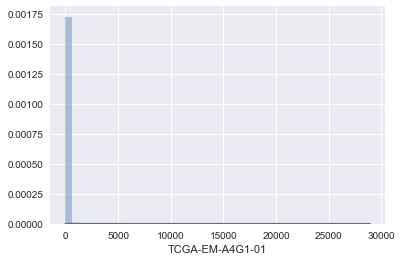

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


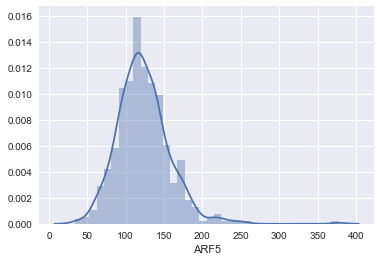

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_thca_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-EM-A4G1-01,TCGA-EL-A4K1-01,TCGA-EL-A4KD-01,TCGA-KS-A4I1-01,TCGA-EL-A4K0-01,TCGA-EM-A4FH-01,TCGA-EM-A4FF-01,TCGA-EL-A4K2-01,TCGA-EL-A4K6-01,TCGA-EM-A4FN-01,...,TCGA-FE-A232-01,TCGA-EL-A3D4-01,TCGA-BJ-A45E-01,TCGA-DE-A69K-01,TCGA-DE-A7U5-01,TCGA-FY-A76V-01,TCGA-DE-A69J-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01,TCGA-4C-A93U-01
A1BG,0.047102,0.047102,0.047102,0.295066,0.046072,0.031349,0.047102,0.047102,0.239148,0.047102,...,0.047102,0.092223,0.047102,0.047102,0.047102,0.054884,0.047102,0.063464,0.047102,0.047102
A1CF,0.025362,0.005463,0.009802,0.007464,0.012998,0.003540,0.003430,0.017345,0.018361,0.028343,...,0.004582,0.002846,0.003084,0.012178,0.006832,0.047180,0.001897,0.008867,0.015910,0.009136
A2M,77.517600,48.870200,204.952000,28.559300,110.354000,112.889000,119.280000,142.071000,17.323400,47.841200,...,111.040000,157.543000,89.915600,117.715000,72.925300,295.781000,99.717600,255.629000,128.357000,167.587000
A2ML1,0.038461,0.014759,0.103634,0.048494,0.126850,0.044543,0.059601,0.054371,0.123163,0.016317,...,0.025594,0.005549,0.021349,0.016728,0.029794,0.151211,0.084156,0.083923,0.096804,0.069350
A3GALT2,0.039900,0.055725,0.029370,0.023221,0.067460,0.013994,0.046208,0.083755,0.058996,0.011336,...,0.056557,0.055725,0.012498,0.025235,0.029506,0.065517,0.055725,0.100606,0.035027,0.055725


In [34]:
normalized_matrix.shape

(18875, 572)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-EM-A4G1-01,TCGA-EL-A4K1-01,TCGA-EL-A4KD-01,TCGA-KS-A4I1-01,TCGA-EL-A4K0-01,TCGA-EM-A4FH-01,TCGA-EM-A4FF-01,TCGA-EL-A4K2-01,TCGA-EL-A4K6-01,TCGA-EM-A4FN-01,...,TCGA-FE-A232-01,TCGA-EL-A3D4-01,TCGA-BJ-A45E-01,TCGA-DE-A69K-01,TCGA-DE-A7U5-01,TCGA-FY-A76V-01,TCGA-DE-A69J-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01,TCGA-4C-A93U-01
A1BG,-1.148720,-1.175372,-1.075384,-0.300179,-1.086730,-1.232863,-1.120533,-1.060644,-0.320155,-1.051978,...,-1.123010,-0.832161,-0.893264,-1.132156,-1.088593,-1.045082,-1.134970,-0.996115,-1.082162,-1.131408
A1CF,-1.417570,-2.111019,-1.757122,-1.897140,-1.636294,-2.180103,-2.258249,-1.494521,-1.434935,-1.272574,...,-2.134956,-2.342752,-2.077156,-1.719618,-1.927111,-1.110769,-2.529964,-1.850871,-1.553523,-1.843683
A2M,2.067639,1.840631,2.563227,1.685649,2.292624,2.323572,2.282994,2.418820,1.539812,1.954783,...,2.249428,2.400397,2.387529,2.265635,2.101244,2.686444,2.190761,2.608970,2.353216,2.419791
A2ML1,-1.236742,-1.679365,-0.732923,-1.084411,-0.646874,-1.080299,-1.018317,-0.998319,-0.608341,-1.512371,...,-1.387913,-2.052788,-1.236932,-1.581753,-1.287498,-0.604942,-0.882927,-0.874761,-0.769311,-0.963405
A3GALT2,-1.220786,-1.102365,-1.280528,-1.404227,-0.921120,-1.583148,-1.128858,-0.810676,-0.928000,-1.670563,...,-1.043568,-1.050954,-1.469455,-1.403199,-1.291719,-0.968170,-1.061963,-0.796016,-1.210807,-1.058401


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-EM-A4G1-01,TCGA-EL-A4K1-01,TCGA-EL-A4KD-01,TCGA-KS-A4I1-01,TCGA-EL-A4K0-01,TCGA-EM-A4FH-01,TCGA-EM-A4FF-01,TCGA-EL-A4K2-01,TCGA-EL-A4K6-01,TCGA-EM-A4FN-01,...,TCGA-FE-A232-01,TCGA-EL-A3D4-01,TCGA-BJ-A45E-01,TCGA-DE-A69K-01,TCGA-DE-A7U5-01,TCGA-FY-A76V-01,TCGA-DE-A69J-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01,TCGA-4C-A93U-01
A1BG,-1.072680,-0.871280,-1.128455,-0.276982,-1.234350,-1.220984,-1.066861,-1.120689,-0.213573,-0.898817,...,-1.096947,-0.839142,-0.910713,-1.130935,-1.205156,-1.193615,-1.068668,-1.010527,-1.206381,-1.131836
A1CF,-1.367158,-1.790778,-1.791634,-1.999373,-1.769534,-2.129374,-2.172473,-1.554390,-1.431584,-1.161966,...,-2.156583,-2.387226,-2.119926,-1.760585,-2.075594,-1.253297,-2.387226,-1.901121,-1.712429,-1.908690
A2M,2.186259,2.248394,2.602788,1.707322,2.251196,2.300371,2.322076,2.403934,1.705868,2.081458,...,2.213118,2.295815,2.588361,2.184460,2.095785,2.619795,2.108138,2.608467,2.283736,2.384638
A2ML1,-1.164131,-1.427681,-0.812685,-1.127847,-0.860377,-1.049216,-0.968651,-1.060996,-0.547671,-1.421651,...,-1.368103,-2.088542,-1.307156,-1.605773,-1.400958,-0.808074,-0.818169,-0.881601,-0.894022,-0.961875
A3GALT2,-1.146661,-0.794355,-1.322978,-1.445185,-1.095731,-1.565417,-1.076622,-0.878388,-0.907436,-1.554390,...,-1.021724,-1.058905,-1.529489,-1.400958,-1.404400,-1.138292,-0.998582,-0.799382,-1.331558,-1.064730


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-EM-A4G1-01,TCGA-EL-A4K1-01,TCGA-EL-A4KD-01,TCGA-KS-A4I1-01,TCGA-EL-A4K0-01,TCGA-EM-A4FH-01,TCGA-EM-A4FF-01,TCGA-EL-A4K2-01,TCGA-EL-A4K6-01,TCGA-EM-A4FN-01,...,TCGA-FE-A232-01,TCGA-EL-A3D4-01,TCGA-BJ-A45E-01,TCGA-DE-A69K-01,TCGA-DE-A7U5-01,TCGA-FY-A76V-01,TCGA-DE-A69J-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01,TCGA-4C-A93U-01
A1BG,0.510228,2.337877,0.004087,7.730978,-0.956884,-0.835592,0.563036,0.074556,8.306395,2.087985,...,0.290009,2.629528,1.980038,-0.018424,-0.691956,-0.587226,0.546639,1.074246,-0.703075,-0.026602
A1CF,1.358195,0.125415,0.122922,-0.481618,0.187236,-0.859936,-0.985359,0.813330,1.170707,1.955326,...,-0.939118,-1.610312,-0.832440,0.213279,-0.703430,1.689544,-1.610312,-0.195694,0.353420,-0.217723
A2M,-0.164154,0.125073,1.774724,-2.393540,0.138115,0.367020,0.468051,0.849088,-2.400307,-0.651990,...,-0.039133,0.345813,1.707569,-0.172530,-0.585298,1.853892,-0.527798,1.801161,0.289584,0.759268
A2ML1,-0.892629,-2.104288,0.723123,-0.725817,0.503861,-0.364315,0.006079,-0.418472,1.941513,-2.076562,...,-1.830379,-5.142560,-1.550180,-2.923054,-1.981428,0.744322,0.697911,0.406284,0.349183,0.037229
A3GALT2,-0.254059,1.288995,-1.026307,-1.561557,-0.030995,-2.088158,0.052702,0.920942,0.793715,-2.039859,...,0.293149,0.130299,-1.930795,-1.367847,-1.382925,-0.217404,0.394508,1.266977,-1.063885,0.104785


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(18875, 572)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18458, 572)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18371, 572)

# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


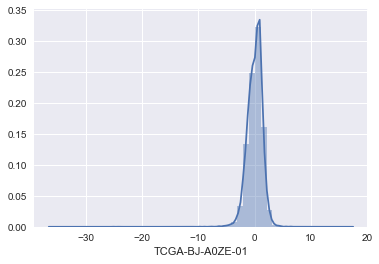

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


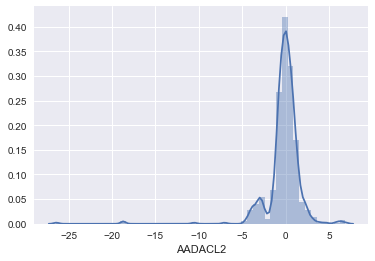

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_thca_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18371, 2)

# Save Gene List

In [56]:
filename = path+'tcga_thca_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-4C-A93U-01,74,FEMALE,M0,N1b,T4a,Stage IVA,Classical/Usual (Papillary NOS),Primary Solid Tumor,Thyroid,NaN
TCGA-BJ-A0YZ-01,65,MALE,M0,N0,T2,Stage II,Classical/Usual (Papillary NOS),Primary Solid Tumor,Thyroid,NaN
TCGA-BJ-A0Z0-01,55,MALE,MX,N0,T2,Stage II,Classical/Usual (Papillary NOS),Primary Solid Tumor,Thyroid,NaN
TCGA-BJ-A0Z2-01,57,MALE,M1,N0,T2,Stage IVC,Thyroid Papillary Carcinoma - Follicular (>= 9...,Primary Solid Tumor,Thyroid,NaN
TCGA-BJ-A0Z3-01,33,FEMALE,M0,N0,T1,Stage I,Classical/Usual (Papillary NOS),Primary Solid Tumor,Thyroid,NaN


In [60]:
attribute_list.shape

(572, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_thca_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-4C-A93U-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z5-01,TCGA-BJ-A0Z9-01,TCGA-BJ-A0ZA-01,TCGA-BJ-A0ZB-01,TCGA-BJ-A0ZC-01,...,TCGA-KS-A4ID-01,TCGA-L6-A4EP-01,TCGA-L6-A4EQ-01,TCGA-L6-A4ET-01,TCGA-L6-A4EU-01,TCGA-MK-A4N6-01,TCGA-MK-A4N7-01,TCGA-MK-A4N9-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.024823,0.216392,0.979511,-0.758571,0.108018,0.569800,0.279395,-0.126174,-0.982039,-0.192576,...,0.657267,-0.217091,-0.175117,0.195418,0.793919,0.265394,0.020679,-0.622328,0.734377,-0.528017
A1CF,-0.238265,0.384102,0.345643,0.692064,-0.528244,-0.343069,-0.503790,0.653561,-0.493329,0.835708,...,0.387599,-0.206816,0.853211,0.202190,-0.255701,-0.954381,0.468083,0.993214,-0.220811,0.275666
A2M,0.594202,0.849868,0.083465,-0.542085,0.198856,0.034578,-0.894877,0.265314,-0.227607,0.307271,...,0.230366,-0.685298,0.181385,-0.653864,-0.730692,-0.196158,-0.010939,0.006592,0.958448,0.251342
A2ML1,0.028477,0.266223,-0.230207,-0.495749,-0.604027,0.364160,-0.621496,-0.191739,0.574087,-0.268630,...,-0.743763,0.182275,0.448104,0.927857,0.024986,-0.642471,0.549601,0.833264,0.339715,0.297707
A3GALT2,0.112224,0.280119,0.882205,-0.572720,0.161178,-0.670509,0.308065,0.493480,0.150707,-0.551775,...,-0.778837,0.388532,-0.607615,0.399001,-0.052058,-0.660048,0.693001,-0.240799,0.836660,-0.530785


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

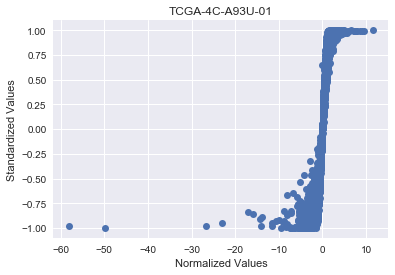

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_thca_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-4C-A93U-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z5-01,TCGA-BJ-A0Z9-01,TCGA-BJ-A0ZA-01,TCGA-BJ-A0ZB-01,TCGA-BJ-A0ZC-01,...,TCGA-KS-A4ID-01,TCGA-L6-A4EP-01,TCGA-L6-A4EQ-01,TCGA-L6-A4ET-01,TCGA-L6-A4EU-01,TCGA-MK-A4N6-01,TCGA-MK-A4N7-01,TCGA-MK-A4N9-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,1,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,1,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_thca_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_thca_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_thca_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_thca_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_thca_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-4C-A93U, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IVA, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0YZ, Age:65.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0Z0, Age:55.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0Z2, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IVC, Histology:Thyroid Papillary Carcinoma - Follicular (>= 99% follicular patterned), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0Z3, Age:33.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0Z5, Age:58.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0Z9, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Thyroid Papillary Carcinoma - Tall Cell (>= 50% tall cell features), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0ZA, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0ZB, Age:66.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IVA, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-BJ-A0ZC, Age:55.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)",...,"(Donor:TCGA-KS-A4ID, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Thyroid Papillary Carcinoma - Follicular (>= 99% follicular patterned), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-L6-A4EP, Age:41.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-L6-A4EQ, Age:47.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-L6-A4ET, Age:49.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IVC, Histology:Thyroid Papillary Carcinoma - Follicular (>= 99% follicular patterned), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-L6-A4EU, Age:58.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Thyroid Papillary Carcinoma - Tall Cell (>= 50% tall cell features), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-MK-A4N6, Age:35.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-MK-A4N7, Age:20.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-MK-A4N9, Age:41.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-MK-A84Z, Age:74.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Thyroid Papillary Carcinoma - Follicular (>= 99% follicular patterned), Tissue:Thyroid, Tumor:nan, Gradenan)","(Donor:TCGA-QD-A8IV, Age:50.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IVA, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-4C-A93U, Age:74.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IVA, Histology:Classical/Usual (Papillary NOS), Tissue:Thyroid, Tumor:nan, Gradenan)",1.000000,-0.044097,-0.124085,-0.074849,0.037310,-0.022325,0.130

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_thca_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

clustergrammer_widget(network='{"mat": [[1.0, -0.044096903520690844, -0.12408512383431902, -0.0748485627395494…

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.079472,-0.127718,-0.097953,0.049930,-0.041477,-0.010637,0.018367,-0.150372,0.099510,...,-0.067728,0.043936,-0.175583,-0.109952,-0.077774,-0.004287,-0.110094,-0.033552,-0.145999,-0.177481
A1CF,-0.079472,1.000000,0.107112,0.042433,0.068665,-0.020356,0.113188,0.048347,0.040787,-0.058033,...,-0.076548,-0.141356,0.111413,0.103959,0.065936,0.121202,-0.035183,-0.127246,0.130343,0.095249
A2M,-0.127718,0.107112,1.000000,0.009740,0.010608,0.121688,-0.052622,-0.009726,0.162598,-0.129562,...,-0.132955,-0.230428,0.040168,-0.129102,-0.090382,-0.192051,-0.036301,0.048455,0.125171,0.204822
A2ML1,-0.097953,0.042433,0.009740,1.000000,0.089073,-0.071423,0.027198,0.183063,-0.015908,0.002602,...,-0.068547,-0.206558,0.103744,0.071295,0.049241,0.048012,0.017988,-0.112723,0.176875,0.119476
A3GALT2,0.049930,0.068665,0.010608,0.089073,1.000000,-0.047814,0.061974,0.174560,0.089283,0.147325,...,-0.038413,0.032691,0.106364,0.059467,0.145352,0.104646,-0.072783,-0.111284,0.061545,0.020233


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_thca_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_thca_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  572 Out of 572   

 The number of statisticaly relevent gene-attribute associations is: 525419
